# Nashville Housing Project
---
By Aaron Joslin-Wangdu on 9/17/2021


## Goal
---
The goal for this project was to investigate the differences in the following data from 2013 to 2016:
1. How many sales there were in each city in the Nashville area?
2. How do sales numbers differ for different land type uses?
3. What is the average sale price for each city?
4. How are the sale prices distributed for each city?
5. Are there 'hot' times that people are buying houses each year and does the city affect this?


## The Data
---
The dataset used in this project is the publicly available [Nashville Housing Dataset](https://www.kaggle.com/tmthyjames/nashville-housing-data) that includes data about property sales in the greater Nashville, Tennessee area. The raw data as well as the cleaned data are located in the [data folder](https://github.com/aaronjoslinwangdu/nashville-housing-project/tree/main/data).


## Preparation
---
The raw dataset was imported into a local database using Microsoft SQL Server Management and all of the cleaning was done there. Supplementary notes and the functions used to clean the data can be located in the [Data_Cleaning_Portfolio_Project_Queries.sql file](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/Data_Cleaning_Portfolio_Project_Queries.sql). The resulting data was then exported to a [.csv file](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Clean.csv).

This file was then imported into Google Sheets and some irrelevant/inaccurate data was removed. The resulting file can be viewed [here](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Clean_v2.csv), and contains the data we will use to conduct the rest of the analysis in this project.


## Analysis
---
We will analyze this data using Python. The packages that were used are: pandas.

First, import all of the necessary packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

Next, create a dataframe by reading the values in the [.csv](https://github.com/aaronjoslinwangdu/nashville-housing-project/blob/main/data/Nashville_Housing_Data_Cleaned.csv) file.

In [22]:
df = pd.read_csv('Nashville_Housing_Data_Clean_v2.csv')

#convert SaleDateConverted column to a date format
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'])

#show table info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56375 entries, 0 to 56374
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UniqueID              56367 non-null  float64       
 1   ParcelID              56367 non-null  object        
 2   LandUse               56367 non-null  object        
 3   SalePrice             56367 non-null  float64       
 4   LegalReference        56367 non-null  object        
 5   SoldAsVacant          56367 non-null  object        
 6   Acreage               25964 non-null  float64       
 7   LandValue             25964 non-null  float64       
 8   BuildingValue         25964 non-null  float64       
 9   TotalValue            25964 non-null  float64       
 10  YearBuilt             24116 non-null  float64       
 11  Bedrooms              24110 non-null  float64       
 12  FullBath              24228 non-null  float64       
 13  HalfBath        

---
See what the first ten rows of the dataframe look like.

In [8]:
testView = df.head(10)
testView

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,...,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState,SaleYear
0,2045.0,007 00 0 125.00,SINGLE FAMILY,240000.0,20130412-0036474,No,2.30,50000.0,168200.0,235700.0,...,3.0,3.0,0.0,2013-04-09,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN,2013.0
1,16918.0,007 00 0 130.00,SINGLE FAMILY,366000.0,20140619-0053768,No,3.50,50000.0,264100.0,319000.0,...,3.0,3.0,2.0,2014-06-10,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN,2014.0
2,54582.0,007 00 0 138.00,SINGLE FAMILY,435000.0,20160927-0101718,No,2.90,50000.0,216200.0,298000.0,...,4.0,3.0,0.0,2016-09-26,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN,2016.0
3,43070.0,007 00 0 143.00,SINGLE FAMILY,255000.0,20160129-0008913,No,2.60,50000.0,147300.0,197300.0,...,3.0,3.0,0.0,2016-01-29,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN,2016.0
4,22714.0,007 00 0 149.00,SINGLE FAMILY,278000.0,20141015-0095255,No,2.00,50000.0,152300.0,202300.0,...,4.0,3.0,0.0,2014-10-10,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN,2014.0
5,18367.0,007 00 0 151.00,SINGLE FAMILY,267000.0,20140718-0063802,No,2.00,50000.0,190400.0,259800.0,...,3.0,3.0,0.0,2014-07-16,1821 FOX CHASE DR,GOODLETTSVILLE,1821 FOX CHASE DR,GOODLETTSVILLE,TN,2014.0
6,19804.0,007 14 0 002.00,SINGLE FAMILY,171000.0,20140903-0080214,No,1.03,40000.0,137900.0,177900.0,...,3.0,2.0,0.0,2014-08-28,2005 SADIE LN,GOODLETTSVILLE,2005 SADIE LN,GOODLETTSVILLE,TN,2014.0
7,54583.0,007 14 0 024.00,SINGLE FAMILY,262000.0,20161005-0105441,No,1.03,40000.0,157900.0,197900.0,...,3.0,2.0,0.0,2016-09-27,1917 GRACELAND DR,GOODLETTSVILLE,1917 GRACELAND DR,GOODLETTSVILLE,TN,2016.0
8,36500.0,007 14 0 026.00,SINGLE FAMILY,285000.0,20150819-0083440,No,1.67,45400.0,176900.0,222300.0,...,3.0,2.0,1.0,2015-08-14,1428 SPRINGFIELD HWY,GOODLETTSVILLE,1428 SPRINGFIELD HWY,GOODLETTSVILLE,TN,2015.0
9,19805.0,007 14 0 034.00,SINGLE FAMILY,340000.0,20140909-0082348,No,1.30,40000.0,179600.0,219600.0,...,5.0,3.0,0.0,2014-08-29,1420 SPRINGFIELD HWY,GOODLETTSVILLE,1420 SPRINGFIELD HWY,GOODLETTSVILLE,TN,2014.0


From the previous two cells we can see that many rows are missing data in columns including **Acreage**, **LandValue**, and **FullBath**. However, these columns won't be used in our analysis and the key columns for this project: **SalePrice**, **PropertySplitCity**, and **Year** are fully populated.


First, count how many sales there were in each city during each year.

In [34]:
df_grouped1 = df.groupby(['SaleYear', 'PropertySplitCity']).size().reset_index()
table1 = pd.pivot_table(df_grouped1, index=['SaleYear'], columns=['PropertySplitCity'])

#rather than have NaN's, fill with zeros since these NaN's represent when there were zero sales in that city
table1 = table1.fillna(0)

#since there is no such thing as a half sale, convert all values to integers
table1 = table1.astype(int)

table1

0                                             \
PropertySplitCity ANTIOCH BELLEVUE BRENTWOOD FRANKLIN GOODLETTSVILLE   
SaleYear                                                               
2013.0               1257        0       357        1            119   
2014.0               1407        1       440        0            166   
2015.0               2002        0       547        0            275   
2016.0               1618        0       352        0            175   

                                                                    \
PropertySplitCity HERMITAGE JOELTON MADISON MOUNT JULIET NASHVILLE   
SaleYear                                                             
2013.0                  652       3     334           29      8198   
2014.0                  838       1     441           44     10487   
2015.0                  876       3     582           88     11748   
2016.0                  759       4     757           19      9782   

                                                                
PropertySplitCity NOLENSVILLE OLD HICKORY UNKNOWN WHITES CREEK  
SaleYear                                                        
2013.0                     56         262       0           24  
2014.0                    121         306       0           22  
2015.0                    154         430       0           27  
2016.0                    163         415       1           24

Check the percentage in which sales grew/declined in each city per year.

In [68]:
table1_pct = table1.pct_change(fill_method='ffill')

#change NaN's to zeros
table1_pct = table1_pct.fillna(0)

table1_pct

0                                             \
PropertySplitCity   ANTIOCH BELLEVUE BRENTWOOD FRANKLIN GOODLETTSVILLE   
SaleYear                                                                 
2013.0             0.000000      0.0  0.000000      0.0       0.000000   
2014.0             0.119332      inf  0.232493     -1.0       0.394958   
2015.0             0.422886     -1.0  0.243182      0.0       0.656627   
2016.0            -0.191808      0.0 -0.356490      0.0      -0.363636   

                                                                        \
PropertySplitCity HERMITAGE   JOELTON   MADISON MOUNT JULIET NASHVILLE   
SaleYear                                                                 
2013.0             0.000000  0.000000  0.000000     0.000000  0.000000   
2014.0             0.285276 -0.666667  0.320359     0.517241  0.279214   
2015.0             0.045346  2.000000  0.319728     1.000000  0.120244   
2016.0            -0.133562  0.333333  0.300687    -0.784091 -0.167348   

                                                                
PropertySplitCity NOLENSVILLE OLD HICKORY UNKNOWN WHITES CREEK  
SaleYear                                                        
2013.0               0.000000    0.000000     0.0     0.000000  
2014.0               1.160714    0.167939     0.0    -0.083333  
2015.0               0.272727    0.405229     0.0     0.227273  
2016.0               0.058442   -0.034884     inf    -0.111111

Now find out the average sale price in each city per year.

In [69]:
df.groupby(['SaleYear','PropertySplitCity']).SalePrice.mean()

SaleYear  PropertySplitCity
2013.0    ANTIOCH              216937.496420
          BRENTWOOD            292749.619048
          FRANKLIN             150000.000000
          GOODLETTSVILLE       152123.882353
          HERMITAGE            170877.806748
          JOELTON              122800.000000
          MADISON              111732.901198
          MOUNT JULIET         221658.896552
          NASHVILLE            261786.504879
          NOLENSVILLE          267498.017857
          OLD HICKORY          175230.480916
          WHITES CREEK         157106.250000
2014.0    ANTIOCH              276101.176972
          BELLEVUE              25000.000000
          BRENTWOOD            293942.502273
          GOODLETTSVILLE       151626.265060
          HERMITAGE            216114.688544
          JOELTON              125000.000000
          MADISON              152976.154195
          MOUNT JULIET         214212.568182
          NASHVILLE            370105.498236
          NOLENSVILLE      

Now check how many sales there are for each land type per year.

In [35]:
df_grouped2 = df.groupby(['SaleYear', 'LandUse']).size().reset_index()
table2 = pd.pivot_table(df_grouped2, index=['SaleYear'], columns=['LandUse'])

#rather than have NaN's, fill with zeros since these NaN's represent when there were zero sales of that type of property
table2 = table2.fillna(0)

#since there is no such thing as a half sale, convert all values to integers
table2 = table2.astype(int)

table2

0                               \
LandUse  APARTMENT: LOW RISE (BUILT SINCE 1960) CHURCH CLUB/UNION HALL/LODGE   
SaleYear                                                                       
2013.0                                        0      4                     0   
2014.0                                        0     15                     1   
2015.0                                        2      5                     0   
2016.0                                        0      9                     0   

                                                    \
LandUse  CONDO CONDOMINIUM OFC  OR OTHER COM CONDO   
SaleYear                                             
2013.0     109                                   4   
2014.0     138                                   6   
2015.0       0                                  22   
2016.0       0                                   3   

                                                         \
LandUse  CONVENIENCE MARKET WITHOUT GAS DAY CARE CENTER   
SaleYear                                                  
2013.0                                0               0   
2014.0                                1               0   
2015.0                                0               1   
2016.0                                0               1   

                                                 ...                        \
LandUse  DORMITORY/BOARDING HOUSE DUPLEX FOREST  ... STRIP SHOPPING CENTER   
SaleYear                                         ...                         
2013.0                          7    322      0  ...                     1   
2014.0                          3    327      1  ...                     0   
2015.0                          3    393      3  ...                     0   
2016.0                          6    330      6  ...                     0   

                                                                         \
LandUse  TERMINAL/DISTRIBUTION WAREHOUSE TRIPLEX VACANT COMMERCIAL LAND   
SaleYear                                                                  
2013.0                                 0      26                      6   
2014.0                                 0      30                      8   
2015.0                                 2      17                      2   
2016.0                                 0      19                      1   

                                                                         \
LandUse  VACANT RES LAND VACANT RESIDENTIAL LAND VACANT RESIENTIAL LAND   
SaleYear                                                                  
2013.0              1145                       0                      0   
2014.0               404                     788                      0   
2015.0                 0                    1658                      3   
2016.0                 0                    1094                      0   

                                                                    
LandUse  VACANT RURAL LAND VACANT ZONED MULTI FAMILY ZERO LOT LINE  
SaleYear                                                            
2013.0                   1                         2           193  
2014.0                   0                         0           262  
2015.0                   0                         0           301  
2016.0                   1                         0           291  

[4 rows x 37 columns]

In [118]:
df.PropertySplitCity.unique()

array(['GOODLETTSVILLE', 'JOELTON', 'MADISON', 'NASHVILLE',
       'WHITES CREEK', 'OLD HICKORY', 'HERMITAGE', 'MOUNT JULIET',
       'UNKNOWN', 'FRANKLIN', 'BELLEVUE', 'ANTIOCH', 'BRENTWOOD',
       'NOLENSVILLE'], dtype=object)

In [51]:
df.LandUse.unique()

array(['RESIDENTIAL CONDO', 'CONDOMINIUM OFC  OR OTHER COM CONDO',
       'VACANT RESIDENTIAL LAND', 'SINGLE FAMILY', 'ZERO LOT LINE',
       'DUPLEX', 'DORMITORY/BOARDING HOUSE', 'QUADPLEX', 'TRIPLEX',
       'SPLIT CLASS', 'RESIDENTIAL COMBO/MISC', 'RESTURANT/CAFETERIA',
       'FOREST', 'DAY CARE CENTER', 'MOBILE HOME', 'CHURCH',
       'NON-PROFIT CHARITABLE SERVICE', 'VACANT RURAL LAND', 'GREENBELT',
       'MORTUARY/CEMETERY', 'VACANT COMMERCIAL LAND', 'NIGHTCLUB/LOUNGE',
       'OFFICE BLDG (ONE OR TWO STORIES)', 'VACANT RESIENTIAL LAND',
       'PARKING LOT', 'PARSONAGE', 'TERMINAL/DISTRIBUTION WAREHOUSE',
       'SMALL SERVICE SHOP', 'APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'ONE STORY GENERAL RETAIL STORE', 'LIGHT MANUFACTURING',
       'CLUB/UNION HALL/LODGE', 'CONVENIENCE MARKET WITHOUT GAS', 'CONDO',
       'VACANT RES LAND', 'VACANT ZONED MULTI FAMILY',
       'STRIP SHOPPING CENTER'], dtype=object)

## Visualizations
---
figures here!


In [17]:
%matplotlib inline
#pies = df.groupby(['Year', 'PropertySplitCity']).size().to_frame('num_sales').plot.pie(subplots=True)

df_grouped = df.groupby(['SaleYear', 'PropertySplitCity']).size().reset_index()
table = pd.pivot_table(df_grouped, index=['SaleYear'], columns=['PropertySplitCity'])

table = table.fillna(0)
table = table.astype(int)
table.head(10)

0                                             \
PropertySplitCity ANTIOCH BELLEVUE BRENTWOOD FRANKLIN GOODLETTSVILLE   
SaleYear                                                               
2013.0               1257        0       357        1            119   
2014.0               1407        1       440        0            166   
2015.0               2002        0       547        0            275   
2016.0               1618        0       352        0            175   

                                                                    \
PropertySplitCity HERMITAGE JOELTON MADISON MOUNT JULIET NASHVILLE   
SaleYear                                                             
2013.0                  652       3     334           29      8198   
2014.0                  838       1     441           44     10487   
2015.0                  876       3     582           88     11748   
2016.0                  759       4     757           19      9782   

                                                                
PropertySplitCity NOLENSVILLE OLD HICKORY UNKNOWN WHITES CREEK  
SaleYear                                                        
2013.0                     56         262       0           24  
2014.0                    121         306       0           22  
2015.0                    154         430       0           27  
2016.0                    163         415       1           24

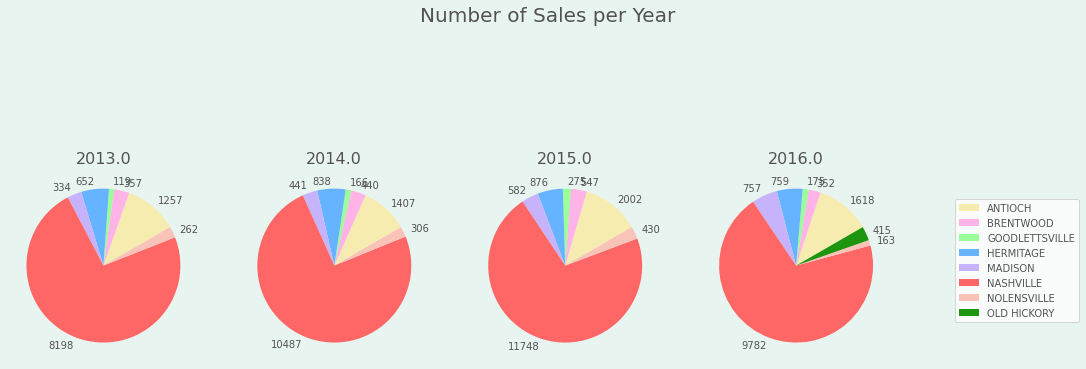

In [32]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7','#1e950e','#7800ff']

fig, axes = plt.subplots(1, 5, figsize=(20, 8), facecolor='#e8f4f0')
fig.delaxes(ax= axes[4])

            
for i, (idx, row) in enumerate(table1.head(4).iterrows()):
    ax = axes[i]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, 
           labels=row.values, 
           startangle=30, 
           colors=colors, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(1.3, .87), # Legend position
                        loc='upper left',  
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color) # Legend font color

fig.subplots_adjust(wspace=.2) # Space between charts

title = fig.suptitle('Number of Sales per Year', y=.95, fontsize=20, color=font_color)
# To prevent the title from being cropped
plt.subplots_adjust(top=0.85, bottom=0.15)

    
    
#link to this https://sharkcoder.com/data-visualization/mpl-pie-charts    


## Difficulties
---
difficulties here!

## Conclusion
---
observations and recommendations here